# Cyclistic Case Study
### Introduction:
This fictional case study is the *Final Capstone Project* in the *Google Data Analytics Certificate*. The data used will be the *divvy* public dataset. The topic is reguarding a bike share company in Chicago called Cyclistic. The bike share program generalizes the customers into two types of riders, <span style = "color:salmon;"> casual riders </span> that buys single-ride passes and/or full-day passes, and <span style = "color:cornflowerblue;"> annual members </span> that buys annual memberships. It has been concluded that annual memberships bring more profit to the company. With many customers already using this program, the company wants advertising strategies to transform casual riders into annual members.
### Scenario
The goal is to use the previous 12 months of trip data to analyze the differences between <span style = "color:salmon;"> casual riders </span> and <span style = "color:cornflowerblue;"> annual members </span>. Determine the key aspects needed for <span style = "color:salmon;"> casual riders </span> to buy an annual membership according to data insights. Use key conclusions to develop new and effective marketing strategies in order to convert <span style = "color:salmon;"> casual riders </span> to <span style = "color:cornflowerblue;"> annual members </span> and present the strategies.
##### Questions to answer:
1. What are the differences between the two rider groups
2. What is needed to transform <span style = "color:salmon;"> casual riders </span> into <span style = "color:cornflowerblue;"> annual members </span>
3. What are some strategies to implement

In [1]:
library(tidyverse) # Load needed libraries
library(lubridate)
library(ggplot2)
library(plyr)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, renam

I have added the datasets from Kaggle, therefore I changed the directory to read the files and changed the directory back later in order to perform analysis correctly. I saved all the file names to a list and appended each of the files to form a data frame consisting of all the data.

In [2]:
setwd("/kaggle/input/")                     # Change directory to read dataset added
mydir = "cyclistic-trips-202108-to-202207"
myfiles = list.files(path = mydir, pattern = "*.csv", full.names = TRUE) 
                                            # Create a list of file names
data = ldply(myfiles, read_csv)             # Append datasets into one
setwd('/kaggle/working')                    # Change directory back

Rows: 804352 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 756147 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 631226 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

I used the function `setNames` set key/value pairs in order to map the month to the season.

In [3]:
months = setNames(c(rep("Winter", 2), rep("Spring", 3), 
                    rep("Summer", 3), rep("Fall", 3), "Winter"), month.name)
months # Output a map that matches months to the correct season

January  February     March     April       May      June      July    August 
 "Winter"  "Winter"  "Spring"  "Spring"  "Spring"  "Summer"  "Summer"  "Summer" 
September   October  November  December 
   "Fall"    "Fall"    "Fall"  "Winter"

1. I added a few more columns using the `mutate` function in order to perform analysis,
* `trip_duration` - the time difference between the starting time and the ending time
* `day_of_week` - use the `weekdays` function to find the day of the week of the trip
* `month` - use the `month.name` function to find the month of the trip
* `season` - use the map created previously to find the season of the trip

2. I filtered out the trip duration that is equal or lower than 0 because that is an invalid trip time so I assume that there is a mistake in the recording of the data.

3. I arranged the trip duration by descending order to better look at the data.

4. I looked at the head of the new data frame to check if everything looks correct.

In [4]:
tripdata = data %>%                                        # Give df new name
    mutate(trip_duration = difftime(ended_at, started_at), # Calculate trip duration
           day_of_week = weekdays(started_at),             # Find day of week
           month = month.name[month(started_at)],          # Find name of month
           season = months[month]) %>%                     # Find name of season
    filter(trip_duration > 0) %>%                          # Make sure time is positive
    arrange(desc(trip_duration))                           # Order by trip duration
head(tripdata)                                             # Look at df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,month,season
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<chr>,<chr>
1,E25E58F5E94EE351,docked_bike,2021-08-01 18:53:10,2021-08-30 16:42:20,Michigan Ave & Jackson Blvd,TA1309000002,Daley Center Plaza,TA1306000010,41.87785,-87.62408,41.88424,-87.62963,casual,2497750 secs,Sunday,August,Summer
2,A310C7270FD730B6,docked_bike,2021-10-02 18:35:36,2021-10-31 01:00:37,Dusable Harbor,KA1503000064,Wells St & Elm St,KA1504000135,41.88698,-87.61281,41.90322,-87.63432,casual,2442301 secs,Saturday,October,Fall
3,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,Sheffield Ave & Fullerton Ave,TA1306000016,NA,NA,41.92560,-87.65371,NA,NA,casual,2175468 secs,Sunday,May,Spring
4,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,Michigan Ave & 14th St,TA1307000124,NA,NA,41.86406,-87.62373,NA,NA,casual,2149238 secs,Wednesday,June,Summer
5,C8DD5E89BE2DAD7B,docked_bike,2021-11-06 16:53:11,2021-12-01 00:10:54,Dearborn Pkwy & Delaware Pl,TA1307000128,NA,NA,41.89897,-87.62991,NA,NA,casual,2099863 secs,Saturday,November,Fall
6,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,Sheffield Ave & Fullerton Ave,TA1306000016,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.92560,-87.65371,41.88996,-87.68065,casual,2061244 secs,Saturday,March,Spring


In [5]:
colors = c("salmon", "cornflowerblue") # Choose colors for graphs
green = "darkseagreen"

This graph shows two boxplots of different colors representing each rider group. <span style = "color:salmon;"> Orange </span> is casual riders and  <span style = "color:cornflowerblue;"> Blue </span> is annual member .

* There is an enourmous amount of outliers, they have to be removed in order to see the statistics better.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



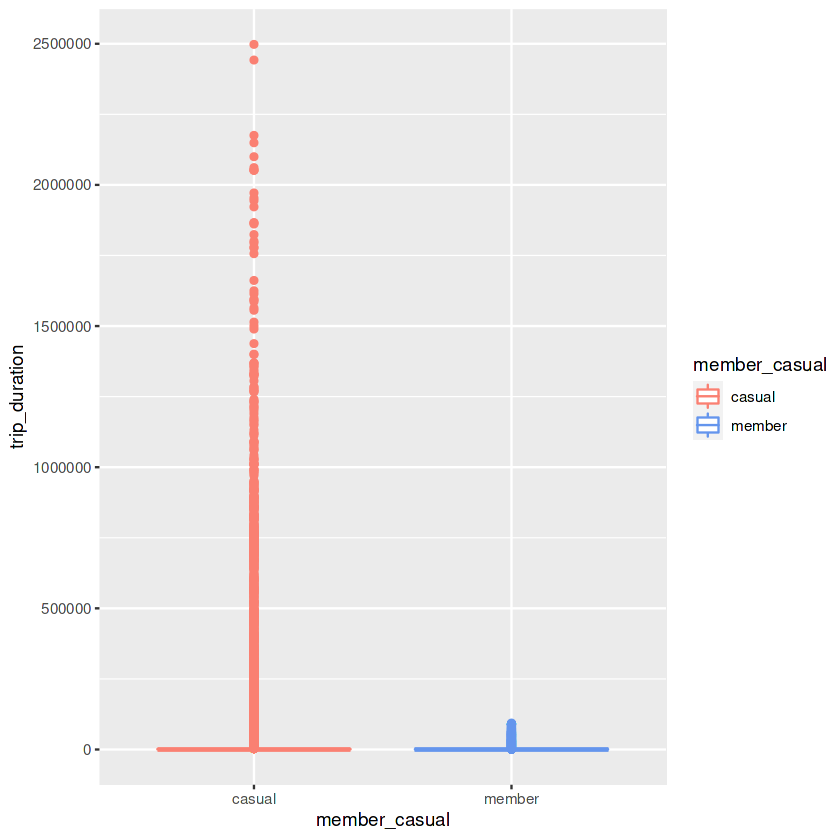

In [6]:
ggplot(tripdata, aes(y = trip_duration, x = member_casual, color = member_casual)) + 
    geom_boxplot() + 
    scale_color_manual(values = colors)

After grahing and removing the outliers, we can say a few things about the trip duration of the <span style = "color:salmon;"> casual riders </span> group. 
* Higher median and wider range
* From the previous graph: there are a lot of outliers
* The mean which are shown by the diamonds are much higher than the median, which means that the data is very skewed (which is also true for the <span style = "color:cornflowerblue;"> annual members </span> group)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



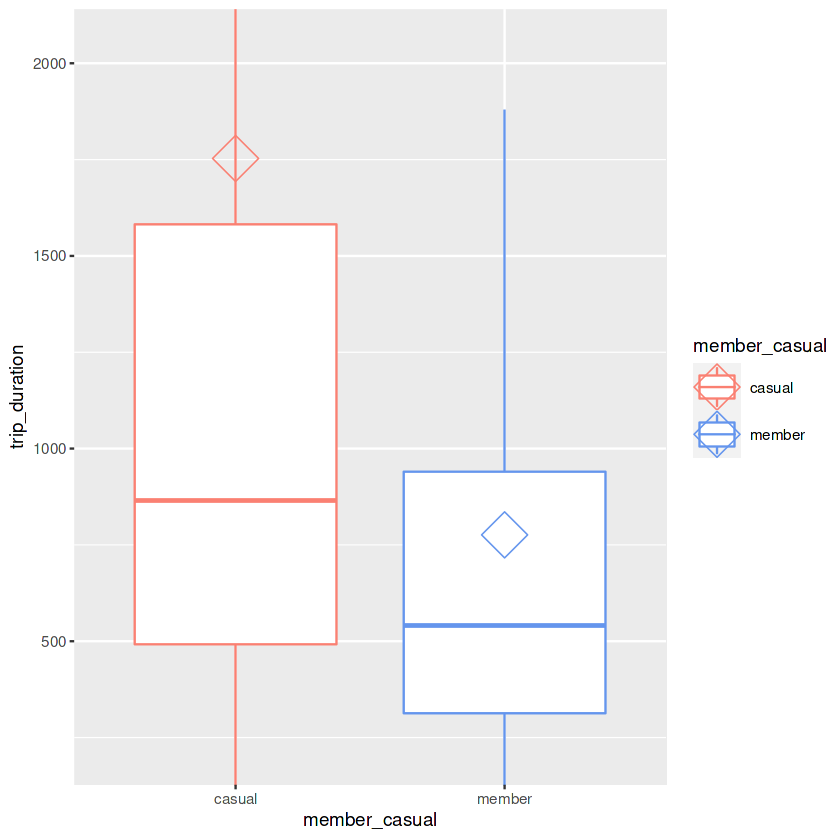

In [7]:
ggplot(tripdata, aes(y = trip_duration, x = member_casual, color = member_casual)) + 
    geom_boxplot(outlier.shape = NA) + 
    coord_cartesian(ylim = quantile(tripdata$trip_duration, c(0.1, 0.9))) + 
    stat_summary(fun.y = mean, geom = "point", shape = 23, size = 10) + 
    scale_color_manual(values = colors)

After looking at the summary statistics using boxplots, I want to see if the outliers from the <span style = "color:salmon;"> casual riders </span> group is systematic by looking at each month.
* From the graph below, we can tell that the outliers are  systematic because there are exceptional amounts of outliers for all months. 

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



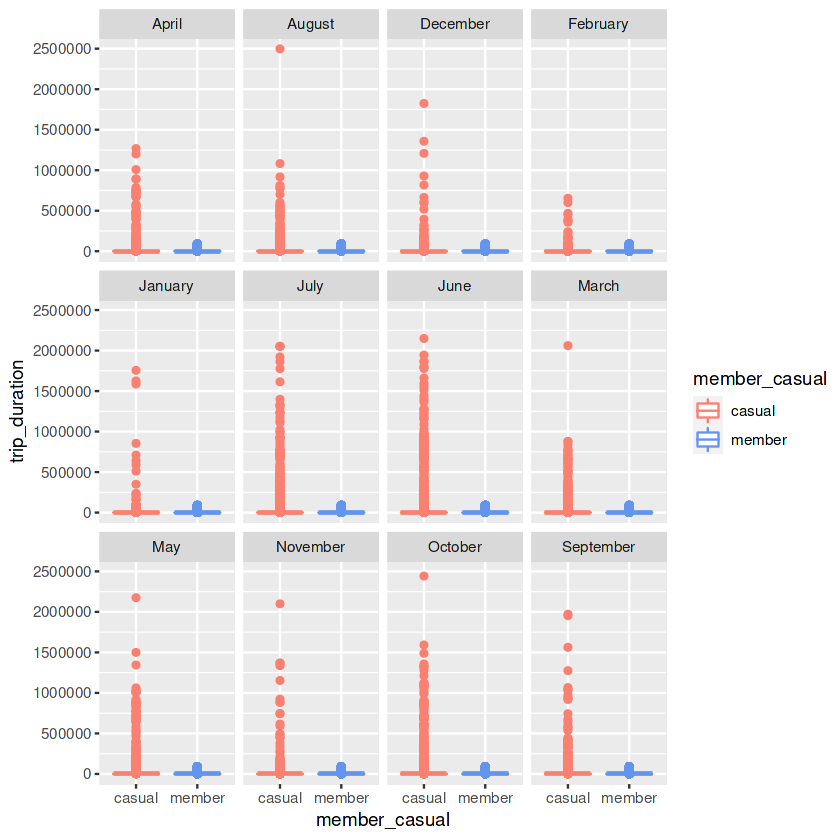

In [8]:
ggplot(tripdata, aes(y = trip_duration, x = member_casual, color = member_casual)) + 
    geom_boxplot() +
    facet_wrap(~month) + 
    scale_color_manual(values = colors)

Looking at the mean, median, and max of the trip durations, I could tell that the mean is much higher than the median, therefore I am more certain that I should remove the outliers before conducting further analysis.

In [9]:
summary = tripdata %>% 
    summarise(mean(trip_duration), median(trip_duration), max(trip_duration))
summary

mean(trip_duration),median(trip_duration),max(trip_duration)
<drtn>,<drtn>,<drtn>
1193.539 secs,657 secs,2497750 secs


Since I have already removed the lower end of the data by removing the trip durations that is lower than or equal to 0, and I see that there is a large number of high outliers accoridng to the summaries, I decided to remove only the higher outliers.

In [10]:
quantile = quantile(tripdata$trip_duration, probs = 0.75) # Find third quartile
iqr = IQR(tripdata$trip_duration)                         # Find interquartile range
upper = quantile + 1.5 * iqr                              # Calculate upper bound

Then I filtered the data to remove the outliers according to the upper bound, and looked at the first few rows to make sure that the process is done correctly.

In [11]:
new_tripdata = tripdata %>%       # Name new df
    filter(trip_duration < upper) # Filter out outliers using upper bound
head(new_tripdata)                # Look at first few rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,month,season
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<chr>,<chr>
1,DEDB67A0DD0E9460,electric_bike,2021-08-22 21:19:20,2021-08-22 21:59:37,NA,NA,NA,NA,41.76000,-87.57000,41.76000,-87.56000,casual,2417 secs,Sunday,August,Summer
2,8C5125156742B2FC,classic_bike,2021-08-28 14:30:23,2021-08-28 15:10:40,Broadway & Ridge Ave,15578,Montrose Harbor,TA1308000012,41.98404,-87.66027,41.96398,-87.63818,casual,2417 secs,Saturday,August,Summer
3,1F330EA64AFDEEC1,classic_bike,2021-08-11 18:05:35,2021-08-11 18:45:52,Broadway & Berwyn Ave,13109,Seeley Ave & Roscoe St,13144,41.97835,-87.65975,41.94340,-87.67962,member,2417 secs,Wednesday,August,Summer
4,DD5C51F09FE45B04,classic_bike,2021-08-06 11:43:45,2021-08-06 12:24:02,Streeter Dr & Grand Ave,13022,Broadway & Waveland Ave,13325,41.89228,-87.61204,41.94907,-87.64864,casual,2417 secs,Friday,August,Summer
5,A52A0521FA60CAA5,electric_bike,2021-08-01 16:34:42,2021-08-01 17:14:59,NA,NA,Columbus Dr & Randolph St,13263,41.92000,-87.70000,41.88427,-87.62033,member,2417 secs,Sunday,August,Summer
6,A2C4A57A76B9B52D,classic_bike,2021-08-14 12:12:18,2021-08-14 12:52:35,Desplaines St & Randolph St,15535,Larrabee St & Menomonee St,TA1306000007,41.88462,-87.64457,41.91468,-87.64332,casual,2417 secs,Saturday,August,Summer


I graphed box plots again after removing the outliers, now the box plot seems much more normal while preserving the basic summaries and differences between the two groups in order to work with the dataset better.
* <span style = "color:salmon;"> Casual riders </span> maintain a higher median and wider range and <span style = "color:cornflowerblue;"> annual members </span> maintain a tigher box
* Data is normally distributed because means and medians are similar to one another

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



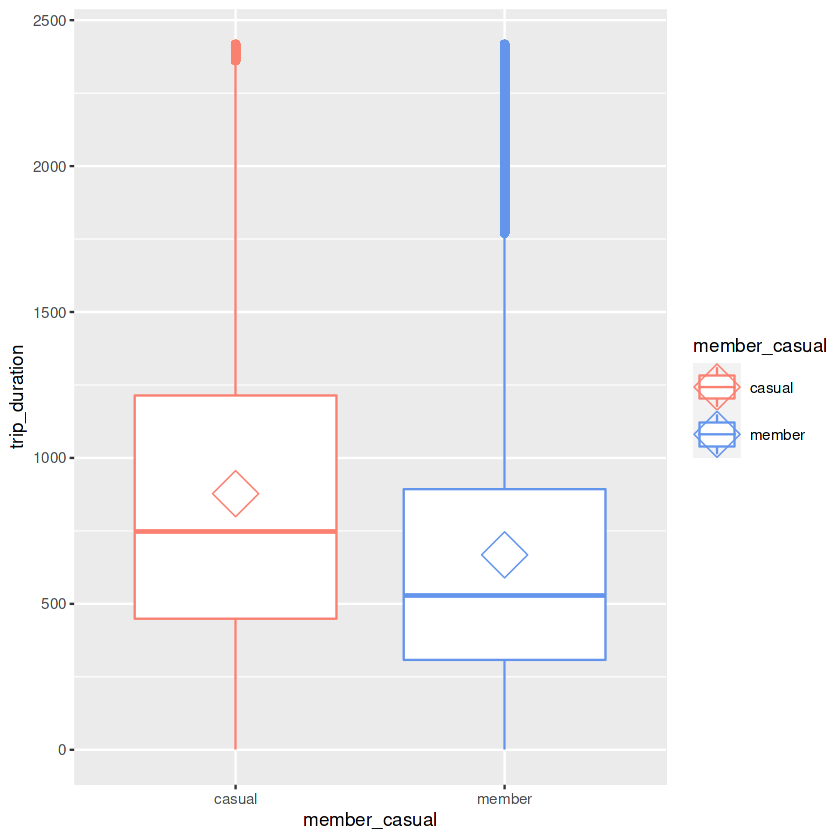

In [12]:
ggplot(new_tripdata, aes(y = trip_duration, x = member_casual, color = member_casual)) + 
    geom_boxplot() + 
    stat_summary(fun.y = mean, geom = "point", shape = 23, size = 10) + 
    scale_color_manual(values = colors)

Looking futher on the data for each month, I am more certain that the general trend is preserved.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



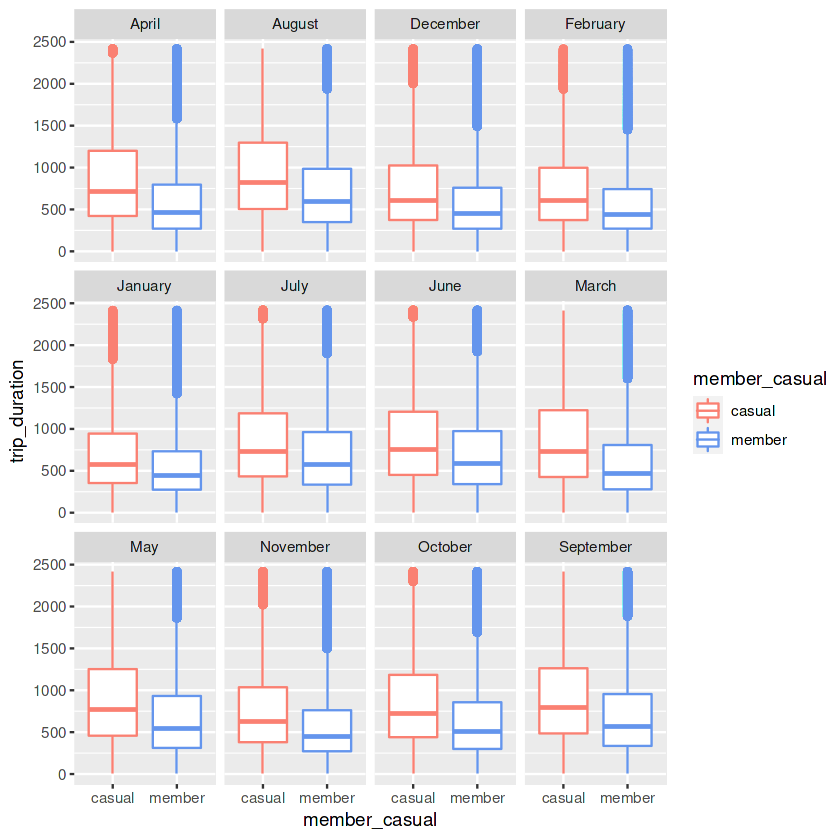

In [13]:
ggplot(new_tripdata, aes(y = trip_duration, x = member_casual, color = member_casual)) + 
    geom_boxplot() +
    facet_wrap(~month) + 
    scale_color_manual(values = colors)

I have to detach package `plyr` and use library `dplyr` because there is a conflict on the function `group_by`, therefore this next step is required to use the function `group_by` correctly.

In [14]:
detach(package:plyr)    
library(dplyr)

I decided to plot line graphs instead of bar graphs because I observed that <span style = "color:salmon;"> casual riders </span> usually have higher trip durations and lower counts while <span style = "color:cornflowerblue;"> annual members </span> usually have lower trip durations and higher counts. If bar graphs were used, it would be obvious that one group have distinctly higher/lower statistics than the other group. It would be more useful to compare the two groups by using line graphs which shows the differences throughout the days of the week.
<br> <br>
First I created a list of days of the week so that later I can reorder the days so that the order makes sense.

In [15]:
week_days = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

This line graph has days of the week on the x-axis and trip counts on the y-axis. Each dot shows the trip counts of one day of the week. The days are ordered from Sunday to Saturday in order to see how the counts changes thoughout a week's period.

* The general trend is that there are higher counts on weekends and lower counts on weekdays, while there is an upward trend from mondays to thursdays

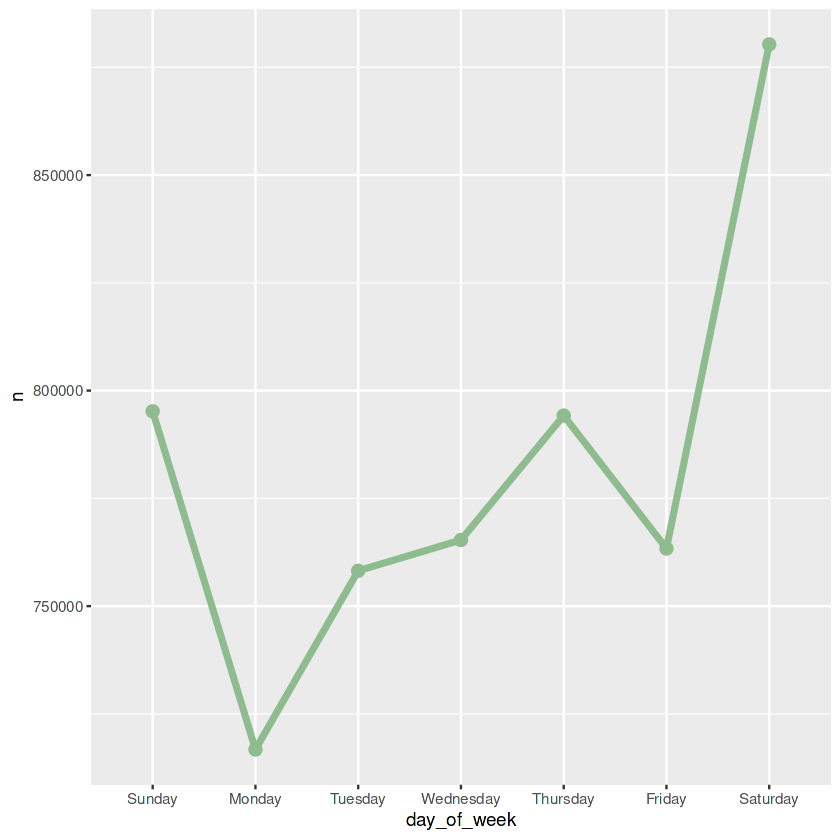

In [16]:
days = new_tripdata %>%
    group_by(day_of_week) %>% 
    count()

days$day_of_week = factor(days$day_of_week, levels = week_days) # Set order of days
days = days[order(days$day_of_week), ]                          # Reorder days of week

ggplot(days, aes(day_of_week, n, group = 1)) + 
    geom_line(color = green, size = 1.5) + geom_point(color = green, size = 3)

The only difference of this graph from the one above is that the y-axis is the average trip duration in the graph below.

* The general trend is that there are higher durations on weekends and lower durations on weekdays, the shape is an upward-facing parabola with Tuesday as the minimum

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



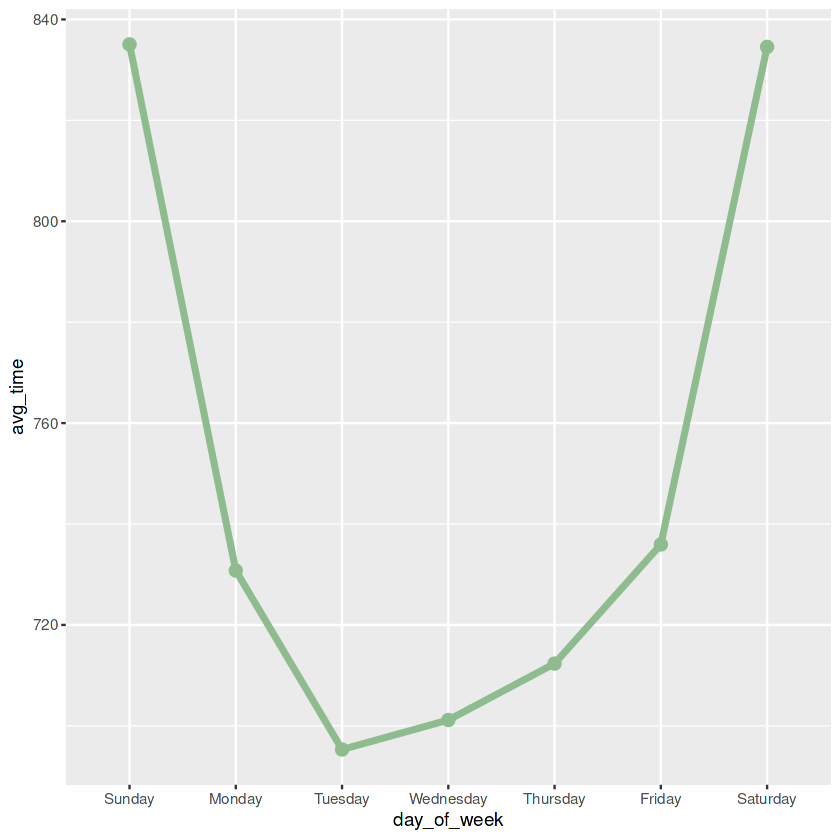

In [17]:
days = new_tripdata %>%
    group_by(day_of_week) %>% 
    summarise(avg_time = mean(trip_duration))

days$day_of_week = factor(days$day_of_week, levels = week_days)
days = days[order(days$day_of_week), ]

ggplot(days, aes(day_of_week, avg_time, group = 1)) + 
    geom_line(color = green, size = 1.5) + geom_point(color = green, size = 3)

The two rider groups have different and almost completely opposite trends.
* <span style = "color:salmon;"> Casual riders </span> have extremely higher counts on weekends with an upward trend on weekdays, there is a upward-facing parabola shape with a min at tuesday.
* <span style = "color:cornflowerblue;"> Annual members </span> have lowest counts on weekends, slightly lower counts near weekends, and stable high counts from tuesday to thursday, which shows an upside-down parabola with a flat peak.

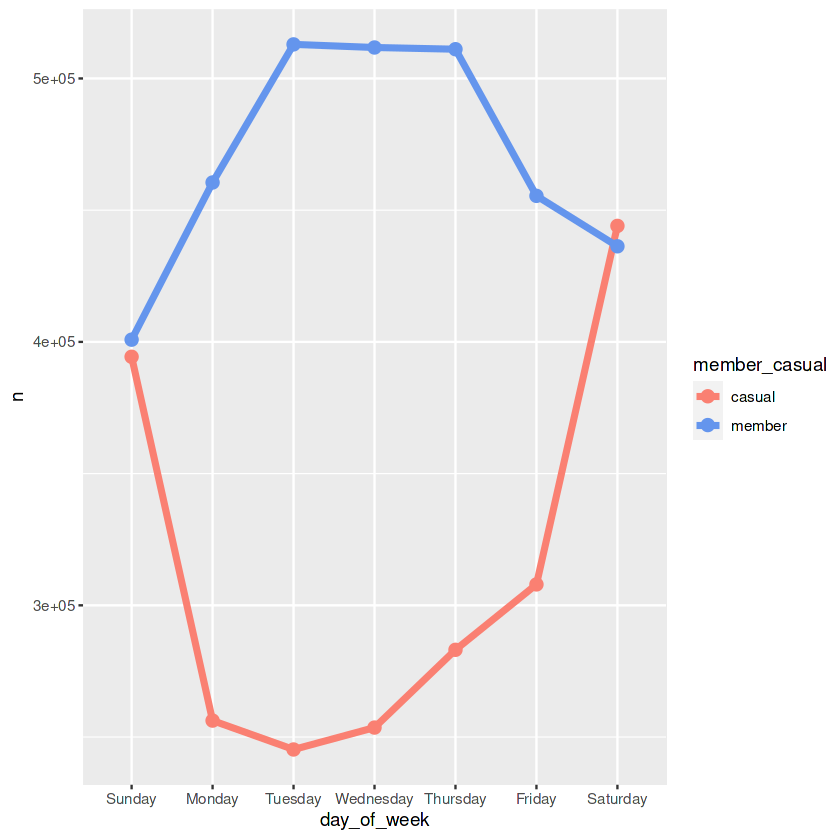

In [18]:
rider_days = new_tripdata %>%
    group_by(day_of_week, member_casual) %>% 
    count()

rider_days$day_of_week = factor(rider_days$day_of_week, levels = week_days)
rider_days = rider_days[order(rider_days$day_of_week), ]

ggplot(rider_days, aes(day_of_week, n, group = member_casual, color = member_casual)) + 
    geom_line(size = 1.5) + geom_point(size = 3) + 
    scale_color_manual(values = colors)

Now looking at the average trip duration,
* The two groups have a similar trend of upward facing parabolas with weekends having higher durations with minimums on Tuesday
* The <span style = "color:salmon;"> casual riders </span> group have much higher trip durations reguardless of day

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



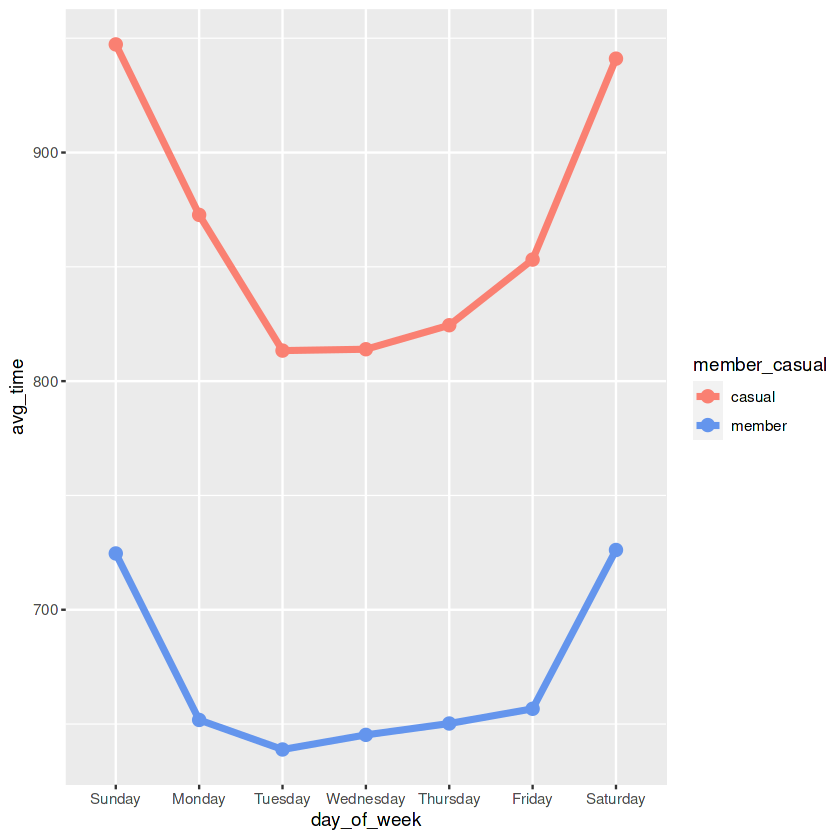

In [19]:
rider_days = new_tripdata %>%
    group_by(day_of_week, member_casual) %>% 
    summarise(avg_time = mean(trip_duration))

rider_days$day_of_week = factor(rider_days$day_of_week, levels = week_days)
rider_days = rider_days[order(rider_days$day_of_week), ]

ggplot(rider_days, aes(day_of_week, avg_time, group = member_casual, color = member_casual)) + 
    geom_line(size = 1.5) + geom_point(size = 3) + 
    scale_color_manual(values = colors)

Next, I decided to look at the overall data seperated into months, to make the graph easier to look at, I also seperated each season into seperate grids. Each color represents a month and each grid is a season.

* There are lowest counts in winter months and higher counts on summer months while fall and spring have moderate counts
* Summer and winter months tend to have less variation among the days of the week compared to fall and spring months.

In [20]:
month_colors = c("slateblue2", "lightblue", # Set colors for each month
                 "mediumturquoise", "mediumspringgreen", "yellowgreen", 
                 "tomato", "orange", "gold", 
                 "lightslategrey", "chocolate", "violet", 
                 "mediumpurple")

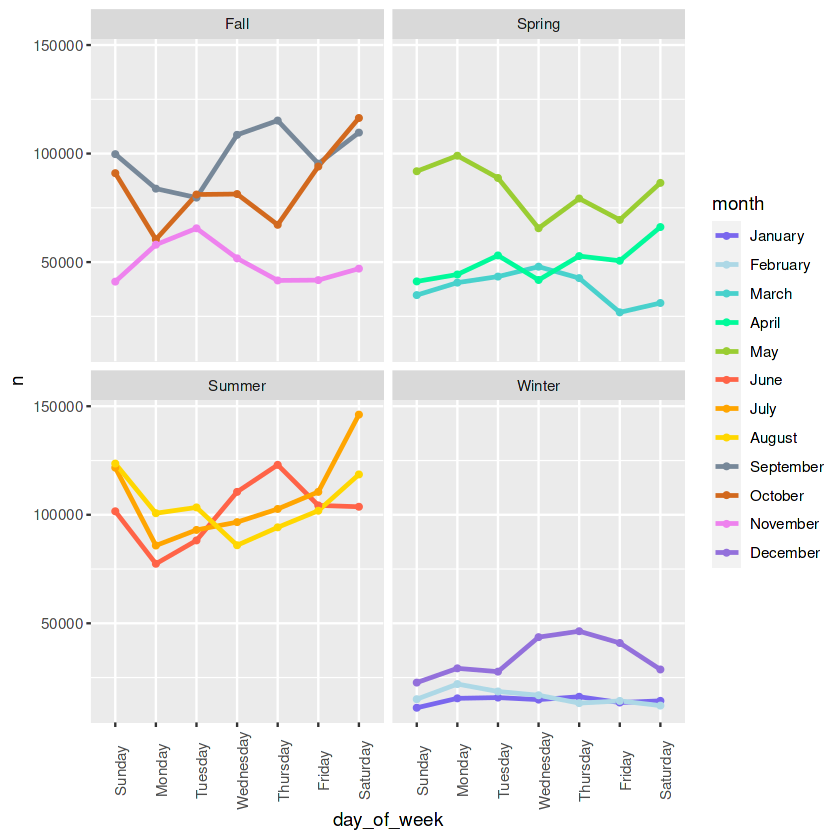

In [21]:
seasons = new_tripdata %>%
    group_by(day_of_week, month, season) %>% 
    count()

seasons$day_of_week = factor(seasons$day_of_week, levels = week_days)
seasons$month = factor(seasons$month, levels = month.name)

seasons = seasons[order(seasons$day_of_week), ]
seasons = seasons[order(seasons$month), ]

ggplot(seasons, aes(day_of_week, n, group = month, color = month)) + 
    geom_line(size = 1) + geom_point(size = 1.2) + facet_wrap(~season) + 
    theme(axis.text.x = element_text(angle = 90)) + 
    scale_color_manual(values = month_colors)

Now looking at the average trip durations, we can see similar trends to the graph above on the counts.
* Winter tends to have lower durations, summer tends to have higher durations while fall and spring have moderate durations
* Each season have similar trends among the months that it has
* Most shows upward parabola shapes with winter having flatter lines
<br>
<br>
Interesting point: In March, wednesday has a much higher average than the days besides it

`summarise()` has grouped output by 'day_of_week', 'month'. You can override
using the `.groups` argument.
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



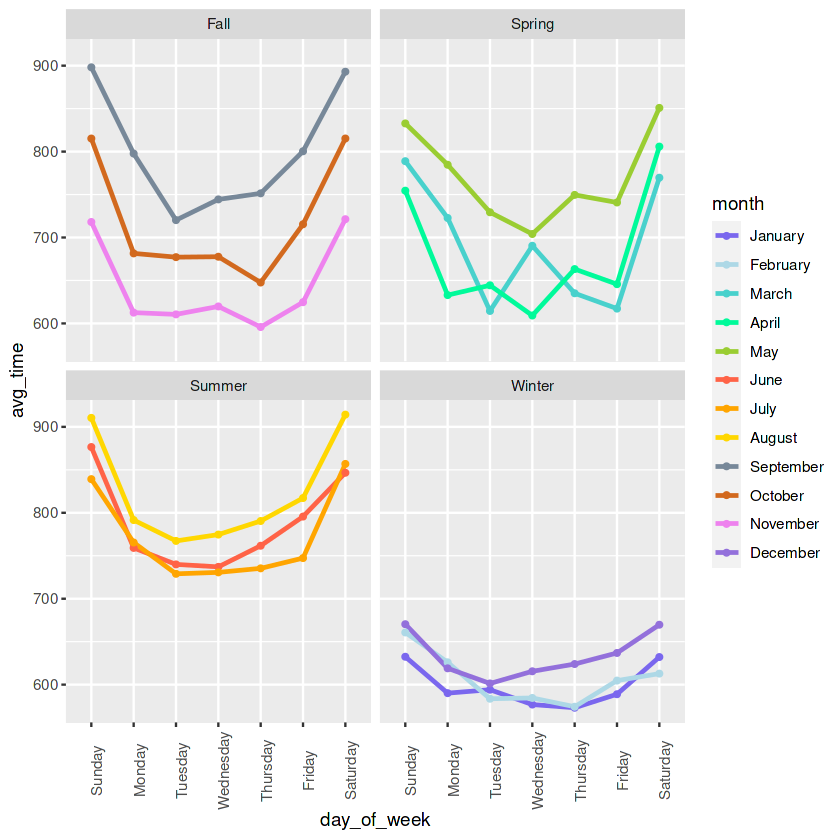

In [22]:
seasons = new_tripdata %>%
  group_by(day_of_week, month, season) %>% 
  summarise(avg_time = mean(trip_duration))

seasons$day_of_week = factor(seasons$day_of_week, levels = week_days)
seasons$month = factor(seasons$month, levels = month.name)

seasons = seasons[order(seasons$day_of_week), ]
seasons = seasons[order(seasons$month), ]

ggplot(seasons, aes(day_of_week, avg_time, group = month, color = month)) + 
    geom_line(size = 1) + geom_point(size = 1.2) + facet_wrap(~season) + 
    theme(axis.text.x = element_text(angle = 90)) + 
    scale_color_manual(values = month_colors)

Next, I looked at line graphs showing the same thing but this time seperated by rider type. The top row of the grid shows <span style = "color:salmon;"> casual riders </span> while the bottom shows <span style = "color:cornflowerblue;"> annual members </span>.
* Although the two rider groups have different trends within the week, they have however similar overall counts for each month.

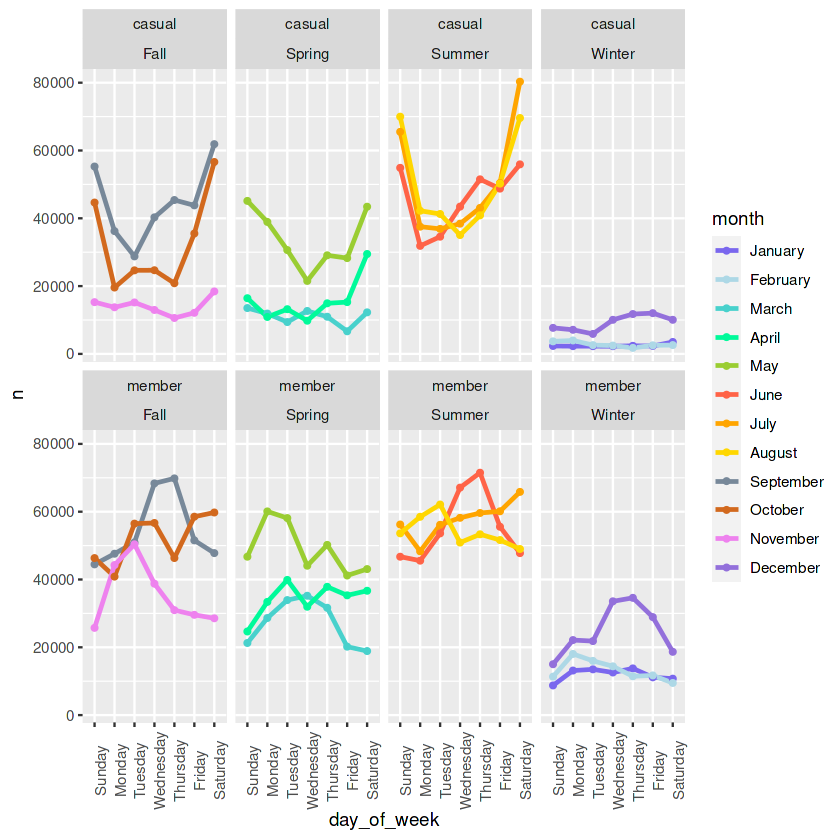

In [23]:
rider_seasons = new_tripdata %>%
    group_by(day_of_week, month, season, member_casual) %>% 
    count()

rider_seasons$day_of_week = factor(rider_seasons$day_of_week, levels = week_days)
rider_seasons$month = factor(rider_seasons$month, levels = month.name)

rider_seasons = rider_seasons[order(rider_seasons$day_of_week), ]
rider_seasons = rider_seasons[order(rider_seasons$month), ]

ggplot(rider_seasons, aes(day_of_week, n, group = month, color = month)) + 
    geom_line(size = 1) + geom_point(size = 1.2) + 
    facet_wrap(member_casual~season, ncol = 4) + 
    theme(axis.text.x = element_text(angle = 90)) + 
    scale_color_manual(values = month_colors)

Next, I created grid plots for each season with seperate lines for rider type to observe the overall trends on each season by rider type. Each graph in the grid is a season and each color is a rider type.

* There are similar trends thoughout each season within the same rider type. <span style = "color:salmon;"> Casual riders </span> shows upward-facing parabolas with flatter minimum while <span style = "color:cornflowerblue;"> annual members </span> shows downward-facing parabolas with sharper maximums
* <span style = "color:cornflowerblue;"> Annual members </span> have higher or equal counts except for summer when <span style = "color:salmon;"> casual riders </span> show higher counts on weekends
* There are clear parabola patterns except for winter when the counts are almost stable thoughout the week

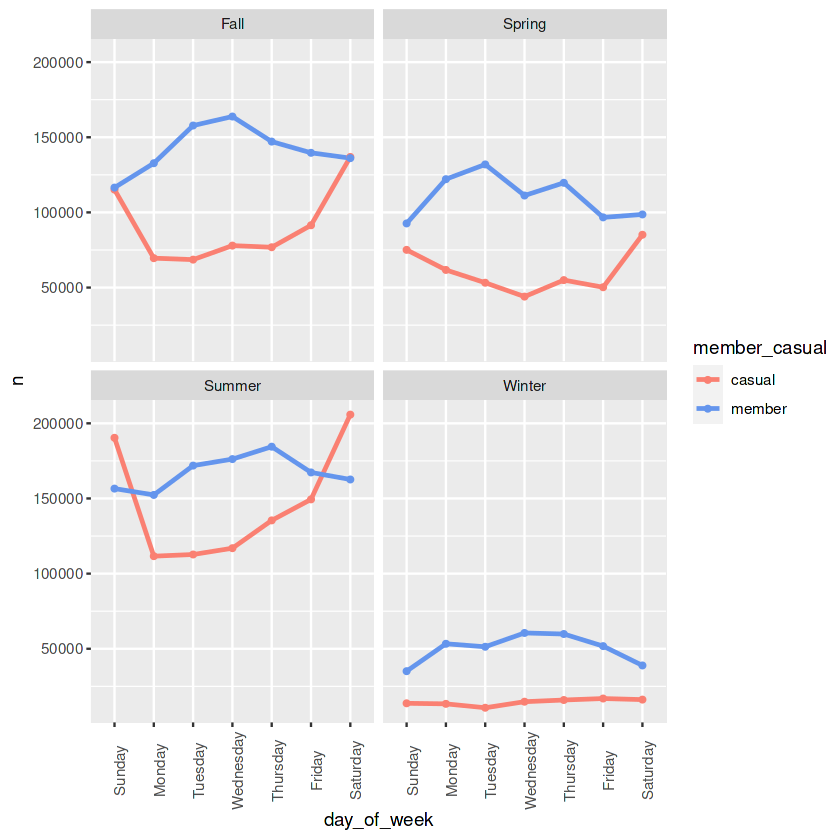

In [24]:
rider_only_seasons = new_tripdata %>%
    group_by(day_of_week, season, member_casual) %>% 
    count()

rider_only_seasons$day_of_week = factor(rider_only_seasons$day_of_week, levels = week_days)
rider_only_seasons = rider_only_seasons[order(rider_seasons$day_of_week), ] %>%
    na.omit(rider_only_seasons)

ggplot(rider_only_seasons, aes(day_of_week, n, group = member_casual, color = member_casual)) + 
    geom_line(size = 1) + geom_point(size = 1.2) + facet_wrap(~season) + 
    theme(axis.text.x = element_text(angle = 90)) + 
    scale_color_manual(values = colors)

Next I decided to look at some of the geophrphical locations to determine areas that include popular stations.
<br>
First I removed the single outlier, then I sampled the data to 1000 random points so that the graph would not be packed.

In [25]:
remove_outlier = new_tripdata %>%
    filter(start_lat < 42.5)
rand_samp = remove_outlier[sample(nrow(remove_outlier), size = 1000), ]

The graph below shows the geographical location of start stations. The x-axis is the lattitude and the y-axis is the longitude. Each rider group is represented by the same color. A larger dot means that the station is more popular, while a smaller dot would mean the opposite.

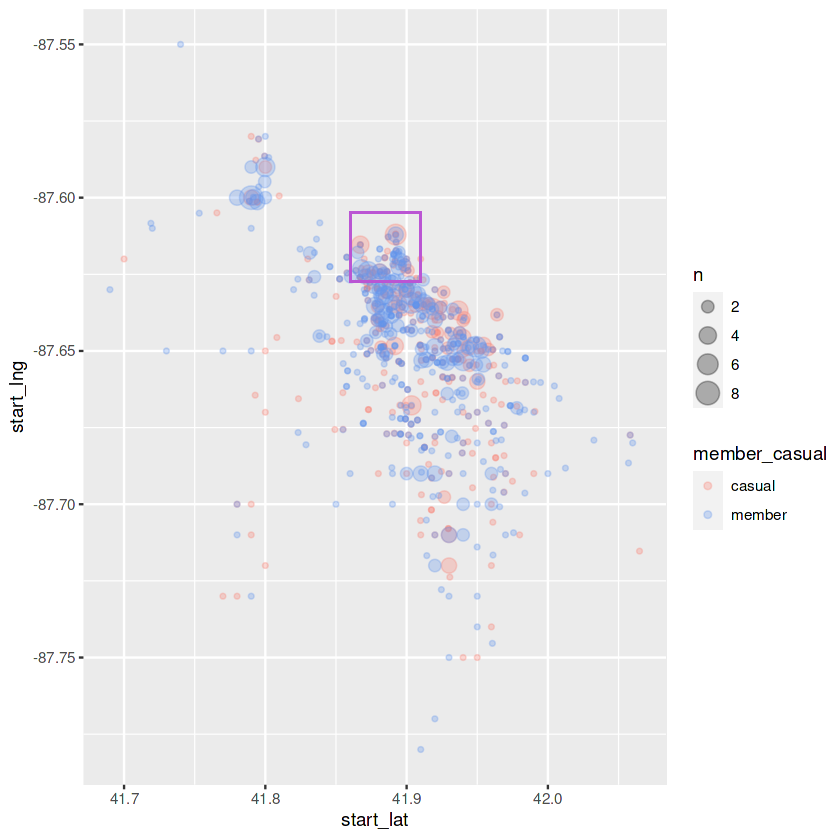

In [26]:
ggplot(rand_samp, aes(x = start_lat, y = start_lng, color = member_casual)) +
    geom_count(alpha = 0.3) + 
    scale_color_manual(values = colors) +
    geom_rect(aes(xmin = 41.86, xmax = 41.91, ymin = -87.6275, ymax = -87.605), 
              fill = NA, color = "mediumorchid")

Below shows the same information put with end stations.
* From both plots I have highlighted an area with <span style = "color:mediumorchid;"> purple </span>, this area seems to be more popular among <span style = "color:salmon;"> casual riders </span>.

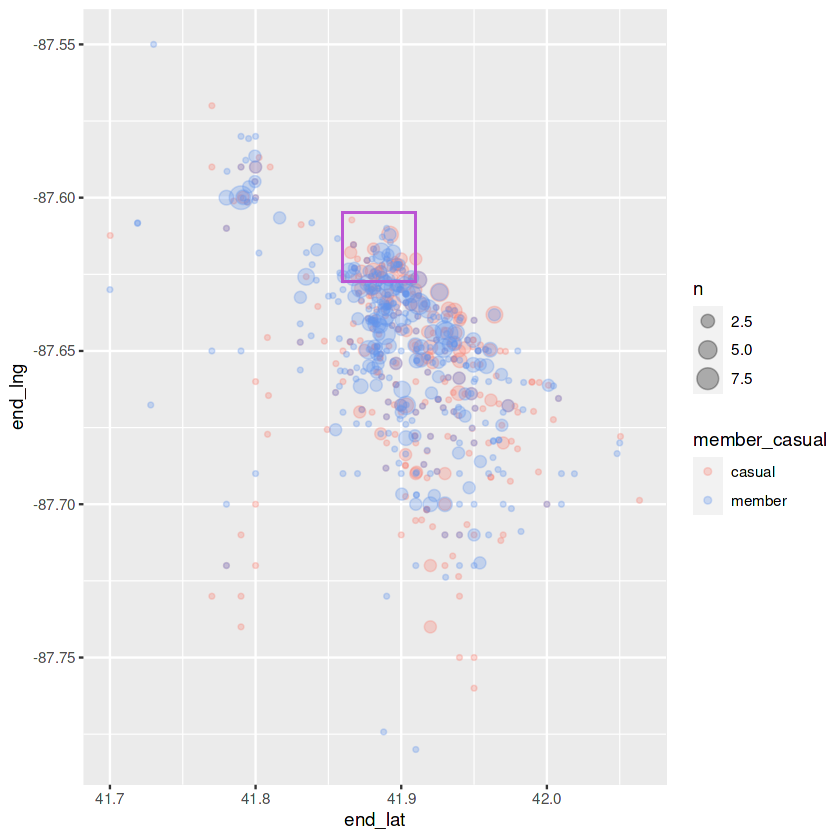

In [27]:
ggplot(rand_samp, aes(x = end_lat, y = end_lng, color = member_casual)) +
    geom_count(alpha = 0.3) + 
    scale_color_manual(values = colors) +
    geom_rect(aes(xmin = 41.86, xmax = 41.91, ymin = -87.6275, ymax = -87.605), 
              fill = NA, color = "mediumorchid")

Some of the popular stations are found below.

In [28]:
popular_stations = remove_outlier %>%
    group_by(start_station_name, member_casual) %>%
    count() %>%
    arrange(desc(n)) %>%
    na.omit()
head(popular_stations)

start_station_name,member_casual,n
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,45033
Kingsbury St & Kinzie St,member,26186
Wells St & Concord Ln,member,23142
Clark St & Elm St,member,23134
DuSable Lake Shore Dr & Monroe St,casual,23073
DuSable Lake Shore Dr & North Blvd,casual,22659


### Conclusion
With these trends, I could tell that <span style = "color:cornflowerblue;"> annual members </span> are mostly people who use this service to make short commutes to work or school on a regular basis, which explains why there are more trips but a lower trip duration as well as a more constant trip duration and counts on weekdays. On the other hand, <span style = "color:salmon;"> casual riders </span> are people who like to take trips weekends, maybe for exercise or to meet with others occasionally. They probably have ways to commute to work or school on a regular basis so they use the service on weekdays less often.
<br>
This story explains the original question of the differences between the two types of riders, with the main insight being <span style = "color:cornflowerblue;"> annual members </span> use the service for work on weekdays while <span style = "color:salmon;"> casual riders </span> use the service for extracurricular activities on weekends.

##### Some points that would make casual riders consider buying annual membership:
1. Converting into using this bike share program to commute to work or school on a regular basis
2. Making the annual membership worth it even only used occasionally for extracurricualar activities
3. More convenience or better prices/deals

##### Possible strategies:
1. **Adding seasonal/monthly memberships:** Due to the different trends for different seasons, customers might be lured to trying out a seasonal membership if they know they would more likely use the program more during a certain season, summer per se. Monthly memberships could be useful for customers to try commuting to work/school using the bike share program, giving them a test period and allowing flexibility.
2. **Incorporating a rewards system:** A rewards system that could provide for certain discounts/deals could increase customers' comeback rates. Customers could collect points from using the service each time, increasing the sense of engagement. This system would encourage customers to use the service more often which would more likely result in a purchase of an annual membership.
3. **Adding extra stations:** Adding additional stations near popular spots among <span style = "color:salmon;"> casual riders </span> could also increase their use of the service which might turn them into <span style = "color:cornflowerblue;"> annual members </span> (`popular_stations` dataframe from above). Areas such as the <span style = "color:mediumorchid;"> highlighted </span> area in the scatter plot above could be great areas to add stations to increase the convenience of both groups of riders.